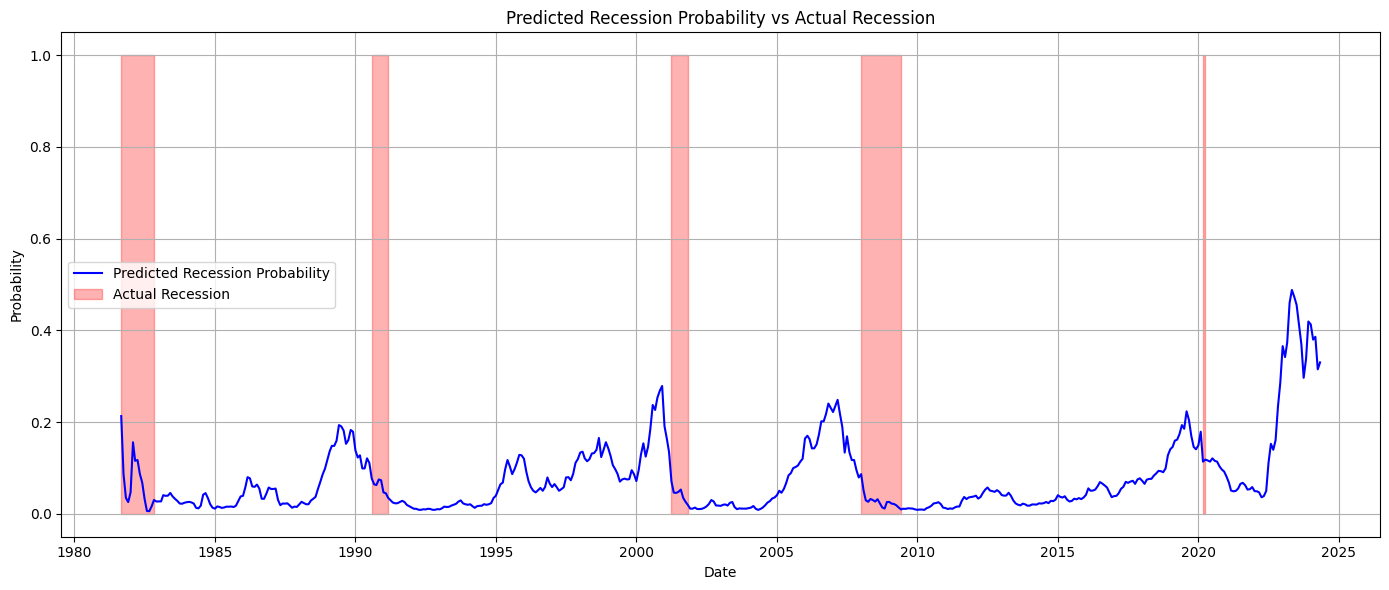

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load cleaned data
PATH = "/Users/rohanjain/Desktop/UMD - MSML/Summer 25/Recession_BondsYield/data/"
df = pd.read_csv(PATH + "yield_merged.csv")
df['DATE'] = pd.to_datetime(df['DATE'])

# Optional: shift USREC to predict recession 12 months ahead
df['Future_Recession'] = df['USREC'].shift(-12)

# Drop NA values created by shifting
df = df.dropna(subset=['Future_Recession'])

# Feature and label
X = df[['Spread']]
y = df['Future_Recession']

# Scale the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Predict probabilities
df['Recession_Prob'] = model.predict_proba(X_scaled)[:, 1]

# Plot probability vs actual
plt.figure(figsize=(14, 6))
plt.plot(df['DATE'], df['Recession_Prob'], label='Predicted Recession Probability', color='blue')
plt.fill_between(df['DATE'], 0, 1, where=(df['USREC'] == 1), color='red', alpha=0.3, label='Actual Recession')
plt.title("Predicted Recession Probability vs Actual Recession")
plt.xlabel("Date")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Joblib to save both the model and the scaler

In [3]:
import joblib
import os

# Create a model output directory if it doesn't exist
MODEL_DIR = "/Users/rohanjain/Desktop/UMD - MSML/Summer 25/Recession_BondsYield/outputs/model/"
os.makedirs(MODEL_DIR, exist_ok=True)

# Save model and scaler
joblib.dump(model, MODEL_DIR + "logistic_model.pkl")
joblib.dump(scaler, MODEL_DIR + "scaler.pkl")

print("Model and scaler saved.")

Model and scaler saved.
